**Generating Gaussian data and applying k-Means clustering**

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [3]:
torch.manual_seed(1)
np.random.seed(69)

mu_A=[-0.5,-0.5]
cov_A=[[1,0.25],[0.25,1]]
mu_B=[0.5,0.5]
cov_B=[[1,0.25],[0.25,1]]

In [7]:
num1=1000
data_points_A=torch.from_numpy(np.random.multivariate_normal(mu_A,covariance_A,num1))
num2=1000
data_points_B=torch.from_numpy(np.random.multivariate_normal(mu_B,covariance_B,num2))
X=torch.cat([data_points_A, data_points_B])


In [ ]:
X

tensor([[-0.8542, -1.5934],
        [-1.0506, -1.7872],
        [ 0.5194,  1.0065],
        ...,
        [-0.7589, -1.7952],
        [-0.2482, -0.1437],
        [ 0.8376,  0.8631]], dtype=torch.float64)

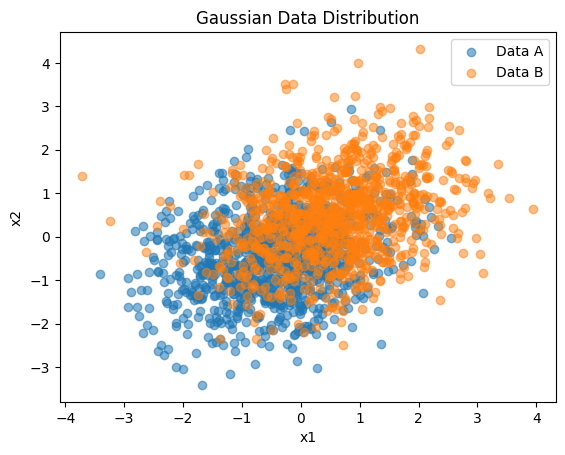

In [8]:
plt.scatter(data_points_A[:, 0], data_points_A[:, 1], alpha=0.55, label='Data A')
plt.scatter(data_points_B[:, 0], data_points_B[:, 1], alpha=0.5, label='Data B')
plt.legend()
plt.title('Gaussian Data Distribution')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [10]:
num_clusters = 2
initial_indices = torch.randint(0, X.shape[0], (num_clusters,))
initial_centroids = X[initial_indices]
initial_centroids

tensor([[-1.6140, -1.1988],
        [-1.0024, -0.2204]], dtype=torch.float64)

In [11]:
# k-Means Clustering
for iteration in range(200):
    # Compute distances from points to centroids
    distances = torch.cdist(X, centroids)
    # Assign each point to the nearest centroid
    cluster_labels = torch.argmin(distances, dim=1)

    # Update centroids
    new_centroids = []
    for cluster_index in range(num_clusters):
        cluster_points = X[cluster_labels == cluster_index]
        if cluster_points.size(0) > 0:
            new_centroid = cluster_points.mean(dim=0)
        else:
            new_centroid = centroids[cluster_index]  # Handle empty clusters
        new_centroids.append(new_centroid)

    new_centroids = torch.stack(new_centroids)

    # Check for convergence
    if torch.all(centroids == new_centroids):
        break

    centroids = new_centroids


In [ ]:
centroids

tensor([[ 0.7430,  0.7526],
        [-0.7415, -0.8210]], dtype=torch.float64)

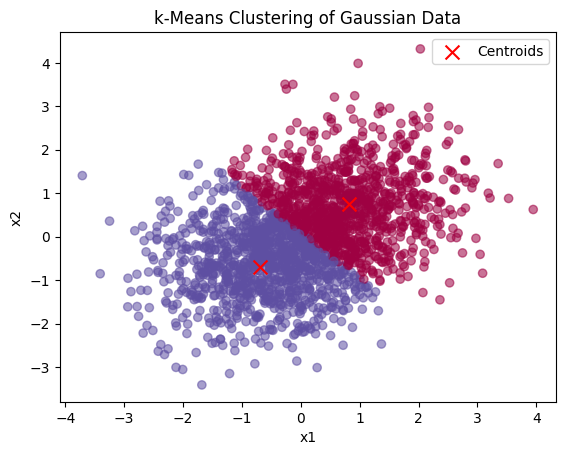

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels.numpy(), alpha=0.55, cmap='Spectral')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.legend()
plt.title('k-Means Clustering of Gaussian Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

**Principal component analysis**

In [13]:
# Data for PCA with different noise level
X1 = np.random.normal(0, 1, (100, 4))
X1[:, 2] = 3 * X1[:, 0] - 2 * X1[:, 1] + np.random.normal(0, 0.2, 100)
X1[:, 3] = 1.5 * X1[:, 0] - 0.5 * X1[:, 1] + np.random.normal(0, 0.2, 100)

In [14]:
# Center the data by subtracting the mean of each feature
X1 = X1 - np.mean(X1, axis=0)

# Convert the centered data to a PyTorch tensor
X1 = torch.from_numpy(X1)


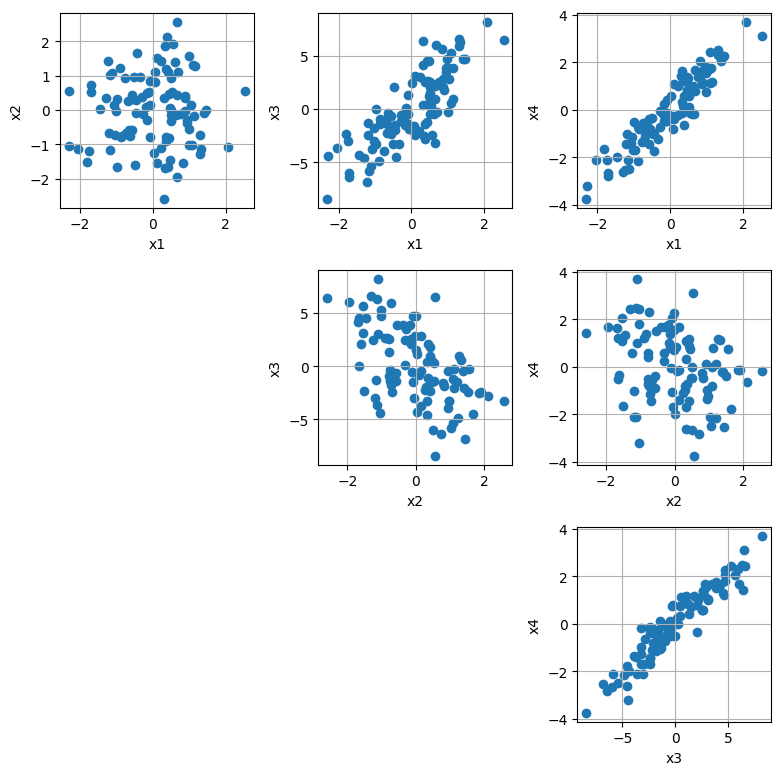

In [15]:
plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4, 4, i*4 + j + 1)
            plt.scatter(X1[:, i], X1[:, j])
            plt.xlabel('x'+str(i+1))
            plt.ylabel('x'+str(j+1))
            plt.grid(True)
plt.tight_layout()

In [16]:
# Compute the covariance matrix
cov_mat = torch.mm(X1.T, X1) / (X1.shape[0] - 1)
cov_mat


tensor([[ 0.9161,  0.0330,  2.7014,  1.3377],
        [ 0.0330,  1.0619, -2.0176, -0.4775],
        [ 2.7014, -2.0176, 12.2295,  4.9881],
        [ 1.3377, -0.4775,  4.9881,  2.2602]], dtype=torch.float64)

In [17]:
# Compute eigenvalues and eigenvectors of the covariance matrix
eigenval, eigenvec = torch.linalg.eigh(cov_mat)
eigenval


tensor([2.6866e-03, 4.3578e-02, 1.1987e+00, 1.5223e+01], dtype=torch.float64)

In [19]:
# Print eigenvectors
eigenvec

tensor([[ 0.8325, -0.1712,  0.4860, -0.2034],
        [-0.4959, -0.3168,  0.7964,  0.1396],
        [-0.2205, -0.3658, -0.1259, -0.8954],
        [-0.1110,  0.8582,  0.3373, -0.3707]], dtype=torch.float64)

In [20]:
ordering=torch.argsort(torch.abs(eigenval),descending=True)
sorted_eigenvec=eigenvec[:,ordering]
sorted_eigenvec

tensor([[-0.2034,  0.4860, -0.1712,  0.8325],
        [ 0.1396,  0.7964, -0.3168, -0.4959],
        [-0.8954, -0.1259, -0.3658, -0.2205],
        [-0.3707,  0.3373,  0.8582, -0.1110]], dtype=torch.float64)

In [21]:
principal_components=sorted_eigenvec[:,:2]
principal_components

tensor([[-0.2034,  0.4860],
        [ 0.1396,  0.7964],
        [-0.8954, -0.1259],
        [-0.3707,  0.3373]], dtype=torch.float64)

In [22]:
principal_components=principal_components.real
X1_new=torch.mm(X1, principal_components)

In [29]:
print('earlier shape: ',X1.shape)
print('new shape: ',X1_new.shape)

earlier shape:  (100, 4)
new shape:  torch.Size([100, 2])


In [30]:
#checking if the answer is right
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X1)
pc=pca.components_.T
for i, component in enumerate(pca.components_):
  print(f"Principal Component {i}: {component}")
  print()

Principal Component 0: [-0.20340763  0.13959903 -0.89539235 -0.37068853]

Principal Component 1: [ 0.48602249  0.796361   -0.12587666  0.33726305]



**Environment Setup**

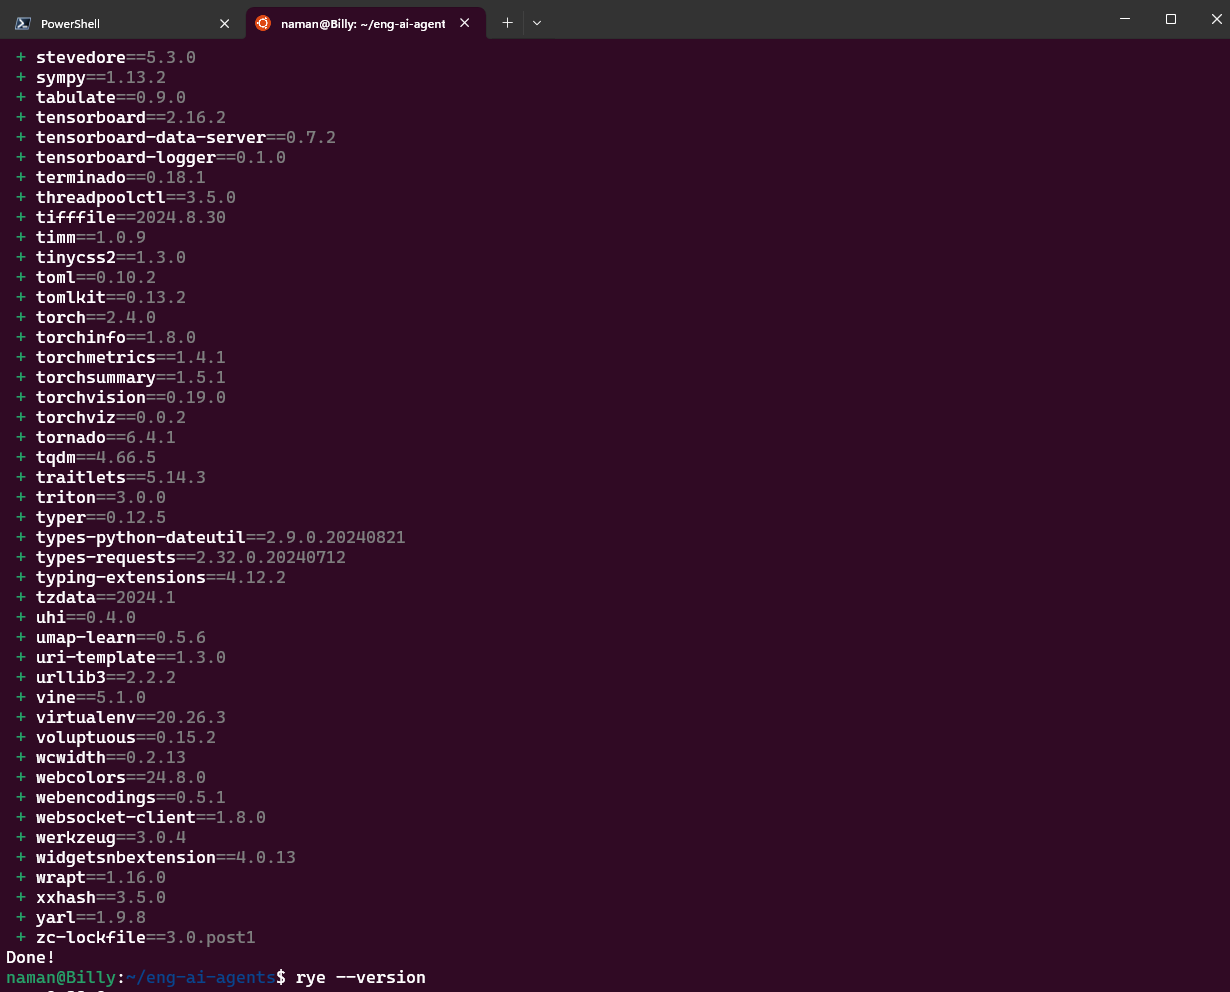